In [1]:
import numpy as np
import cmath
import pandas as pd
import time
import matplotlib.pylab as plt
%pylab inline


import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['axes.grid'] = True
mpl.rcParams['font.family'] = 'Ubuntu'
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
# чтобы был русский шрифт
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


C:\Users\swink_000\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Вопрос 1

* Чем отличаются list & tuple? List(список) - изменяемый список, tuple(кортеж) - неизменяемый список. При изменении кортежа, создается новый объект в памяти, при изменении списка, ничего не создается.

* Какой из них можно добавлять в качестве ключа в dict и добавлять в set? Почему? В качестве ключа в dict можно добавлять кортеж, так как в словаре все ключи должны быть уникальны, а каждый кортеж, в свою очередь, создает новый объект в памяти, следовательно каждый кортеж в памяти уникален. В set можно добавлять, как кортеж, так и список(в любом случае, мы будем хранить только уникальные элементы)

* На какой структуре данных реализван dict? Dict - множество (key, value) пар. Где key - любой неизменяемый тип данных(хэшируемый).

* Чем отличается range от xrange в Python 2? Range- создает список с заданными верхними и нижними границами и указанным шагом. Xrange - создает объект xrange, который производит те же элементы, что и range, но не хранит их в памяти. Нужен для большого количества элементов.

* Что такое list comprehension? List comprehension - краткий способ создавать список. Структура LC следующая: [expression for item in list if conditional] 

* Как работают map & reduce в Python? Map, reduce - first class functions. Map - применяет к данному итерируемому объекту нужную операцию, синтаксис такой: map(function,iterator). Reduce - последовательно применяет операцию к двум элементам списка, потом к следующим и тд, после одного прохода, делает так опять, и так пока не останется 1 элемент.

### Вопрос 2

Напишите рекурсивную функцию, возвращающую N число Фибоначчи и проверте работу для небольших N

In [20]:
def FibonachiNumber(i):
    if i < 2:
        return i
    else:
        return FibonachiNumber(i - 1) + FibonachiNumber(i - 2)

print 'F({0}) = {1}'.format(5, FibonachiNumber(5))
print 'F({0}) = {1}'.format(12, FibonachiNumber(12))
print 'F({0}) = {1}'.format(22, FibonachiNumber(22))

F(5) = 5
F(12) = 144
F(22) = 17711


### Вопрос 3

Измерьте время работы рекурсивной функции Фибоначчи

In [23]:
Narray = range(0,50,5)
timeTakenArray = []
for nth in Narray:
    print nth
    time1 = time.time()
    FibonachiNumber(nth)
    time2 = time.time()
    timeTakenArray.append((time2-time1))

0
5
10
15
20
25
30
35
40
45


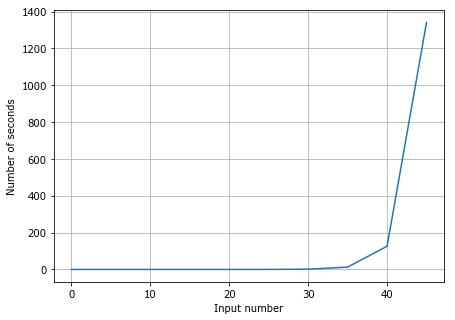

In [33]:
plt.rcParams['figure.figsize'] = 7,5
plt.plot(Narray, timeTakenArray)
plt.xlabel('Input number')
plt.ylabel('Number of seconds')

### Вопрос 4

Функция, которая возвращает через запятую модуль и аргумент комплексного числа по заданной мнимой и действительной части

In [63]:
def complexNumbers(z):
    module = np.sqrt(z.real ** 2 + z.imag ** 2)
    argument = cmath.phase(z)
    return module, argument

complexNumbers(1)

(1.0, 0.0)

### Вопрос 5

Напишите docstrings к последней функции, проверьте ее с помощью doctest.

In [21]:
import doctest

def complexNumbers(z):
    """
    Return module and argument of input complex number in form of z = a + b*i
    >>> complexNumbers(-1)
    (1.0, np.pi)
    >>> complexNumbers(1)
    (1.0, 0.0)
    """
    module = np.sqrt(z.real ** 2 + z.imag ** 2)
    argument = cmath.phase(z)
    return module, argument

doctest.testmod()

**********************************************************************
File "__main__", line 6, in __main__.complexNumbers
Failed example:
    complexNumbers(-1)
Expected:
    (1.0, np.pi)
Got:
    (1.0, 3.141592653589793)
**********************************************************************
1 items had failures:
   1 of   2 in __main__.complexNumbers
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=2)

### Вопрос 6

Реализуйте класс базовых чисел с самым базовым функционалом

In [77]:
class complexNumber:
    def __init__(self, real, imag):
        self._real = real
        self._imag = imag
    
    def module(self):
        module = np.sqrt(self._real ** 2 + self._imag ** 2)
        return module
    
    def argument(self):
        argument = cmath.phase(complex(self._real, self._imag))
        return argument
        
z = complexNumber(-1,0)
print 'complex Module = {0}'.format(z.module())
print 'complex Argument = {0}'.format(z.argument())

complex Module = 1.0
complex Argument = 3.14159265359


### Вопрос 7

Напишите кэширующий декоратор и декоратор, вычисляющий время работы функции. Объясните, как они работают, сравните результаты при применении этих декораторов к функции Фибоначчи.

#### Cashing decorator


In [62]:
def cachingDecorator(function):
    """
    Декоратор, который хранит в себе посчитанные значения последовательности и когда они встречаются
    опять, он их достает из памяти, а не считает заного
    """
    cache = {}
    def decorated_function(*args):
        if args in cache:
            return cache[args]
        else:
            val = function(*args)
            cache[args] = val
            return val
    return decorated_function

@cachingDecorator
def FibonachiNumber(i):
    if i < 2:
        return i
    else:
        return FibonachiNumber(i - 1) + FibonachiNumber(i - 2)

In [55]:
#without decorator
time1 = time.time()
FibonachiNumber(35)
time2 = time.time()
print time2 - time1

13.1450002193


In [77]:
#with decorator
time1 = time.time()
FibonachiNumber(35)
time2 = time.time()
print time2 - time1

0.000999927520752


#### Time decorator

In [2]:
def timeDecorator(function):
    def decorated_function(*args):
        time1 = time.time()
        res = function(*args)
        time2 = time.time()
        return time2 - time1
    return decorated_function

@timeDecorator
def FibonachiNumber(i):
    if i < 2:
        return i
    else:
        return FibonachiNumber(i - 1) + FibonachiNumber(i - 2)
    
FibonachiNumber(20)

0.06299996376037598

### Вопрос 8

Чем отличается задание поля x через self.x = , от объявления метода с декоратором property?

Есть несколько отличий property от задания x через self.x = :

* Property - может быть вычисляемым аттрибутом класса

* Используя property можно сделать getter и setter для инкапсуляции аттрибутов класса. Таким образом, например, мы сможем контролировать, что как задавать аттрибуты.(Если мы например не можем сделать значение выше некоторого класса, мы можем описать это поведение в setter)

### Вопрос 9

Напишите getter и setter для класса complexNumber.

In [84]:
class complexNumber:
    def __init__(self):
        self._real = None
        self._imag = None
        
    @property
    def real(self):
        return self._real
    
    @property
    def imag(self):
        return self._imag
    
    @real.setter
    def real(self, value):
        self._real = value
        
    @imag.setter
    def imag(self, value):
        self._imag = value
    
z = complexNumber

z.real = 1 #setter
z.imag = np.pi #setter
print z.real, z.imag

a = z.real #getter
b = z.imag #getter
print a, b

1 3.14159265359
1 3.14159265359
